# House Prices Prediction – Kaggle Competition

**Author:** Zhen Xu  
**Objective:** Predict residential property sale prices using feature engineering and machine learning models  
**Project Type:** Supervised Machine Learning (Regression)  
**Date:** Feb 2026  

**Tech Stack:**  
Python · Pandas · NumPy · scikit-learn · XGBoost · LightGBM  

**Models Explored:**  
Regularized Linear Regression (Ridge / Lasso / ElasticNet) ·  
Random Forest · Gradient Boosting · XGBoost · LightGBM    

## Problem Statement

The objective of this project is to build a machine learning model that can accurately **predict the final sale price (`SalePrice`) of residential homes** in Ames, Iowa.

The dataset is provided by Kaggle’s **House Prices: Advanced Regression Techniques** competition and contains **79 explanatory variables** describing various aspects of houses, including:

- Property size (e.g., LotArea, GrLivArea)
- Construction details (e.g., YearBuilt, OverallQual)
- Location (e.g., Neighborhood)
- Quality and condition ratings
- Basement, garage, and amenities features

These are given:

- **Training data (`train.csv`)**  
  Contains house features **and the target variable (`SalePrice`)**

- **Test data (`test.csv`)**  
  Contains the same features **without `SalePrice`**, which must be predicted

The goal is to learn the relationship between house characteristics and their sale prices, then generalize the model to unseen data.

---

## Task Type

This is a **supervised regression problem**, where:

- Target variable: `SalePrice` (continuous)
- Objective: Minimize prediction error

---

## Evaluation Metric

Kaggle evaluates submissions using:

**Root Mean Squared Log Error (RMSLE)**

RMSLE measures the difference between the logarithm of predicted prices and actual prices.  
This metric penalizes large percentage errors and reduces the impact of extreme price values.

---

## Project Approach

This notebook follows an end-to-end machine learning workflow:

1. Data exploration & understanding  
2. Missing value treatment  
3. Feature engineering  
4. Encoding categorical variables  
5. Target transformation (log)  
6. Model training  
7. Cross-validation  
8. Model comparison  
9. Final prediction & submission

## Competition Link
Kaggle: House Prices – Advanced Regression Techniques

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as stat
import math

pd.set_option('display.max_columns',200)

In [63]:
df=pd.read_csv('train.csv')

# Data Understanding

Before building predictive models, I first explore the dataset to understand:

- Data structure and feature types
- Dataset dimensions
- Summary statistics
- Potential anomalies or outliers

---

## Preview of the Dataset

In [64]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Structure & Types

Inspect feature names, non-null counts, and data types.
This helps identify:

- Numerical vs categorical variables
- Missing values
- Potential type corrections

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Dataset Dimensions

Check the number of observations and features.

In [66]:
df.shape

(1460, 81)

## Summary Statistics

Review statistical properties of numerical features,
including mean, standard deviation, and extreme values.

This step helps detect:

- Skewed distributions
- Suspicious min/max values
- Possible outliers

In [67]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [68]:
train=df

# Missing Values Check

I examine missing values to understand data completeness and
identify features requiring imputation.

---

## Missing Value Counts

In [69]:
null_ck=train.isna().sum()

nul=null_ck[null_ck>0].sort_values(ascending=False)
print(nul)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


## Missing Value Percentage

Compute the proportion of missing values relative to the dataset size.

In [70]:
nul/1460

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

# Duplicate Values Check

Check whether duplicate observations exist in the dataset.

In [71]:
train[train.duplicated()==True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [72]:
train.duplicated().sum()

np.int64(0)

No duplicate rows were detected. Therefore, no deduplication
steps are required.

# Exploratory Data Analysis (EDA)

## Target Variable Distribution

I first examine the distribution of the target variable (`SalePrice`)
to understand its statistical properties before modeling.

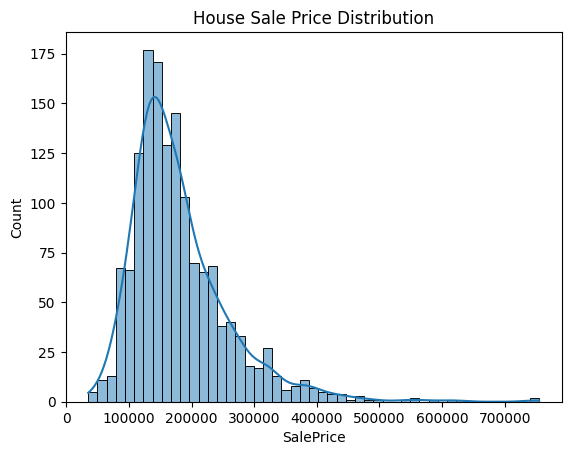

In [73]:
sns.histplot(train['SalePrice'],kde=True)
plt.title('House Sale Price Distribution')
plt.show()

## Skewness

In [74]:
train['SalePrice'].skew()

np.float64(1.8828757597682129)

## Normality Assessment (Q–Q Plot)

<Figure size 600x400 with 0 Axes>

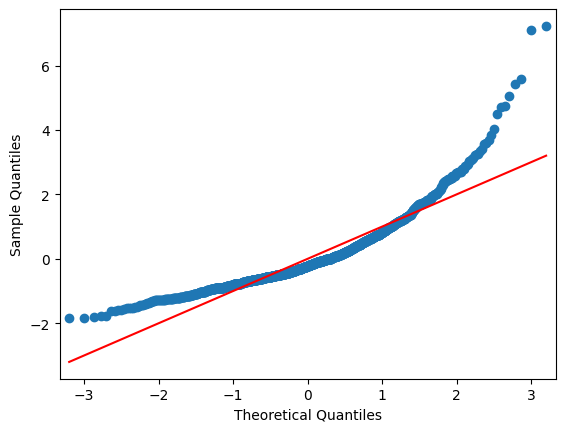

In [75]:
plt.figure(figsize=(6,4))
stat.qqplot(train['SalePrice'],line='s',fit=True)
plt.show()

The target variable (`SalePrice`) exhibits a clear right-skewed distribution.
This indicates that a small number of high-priced houses create a long
right tail.

Modeling on the original scale may cause algorithms to be disproportionately
influenced by expensive outliers. To mitigate this effect, I apply a
logarithmic transformation.

The log transformation:

- Reduces skewness
- Stabilizes variance
- Improves numerical stability
- Converts multiplicative relationships into additive ones

Although the histogram does not appear extremely skewed at first glance,
the Q–Q plot and skewness statistic confirm deviation from normality,
supporting the use of a log-transformed target.

## Check the Effect of Target Transformation

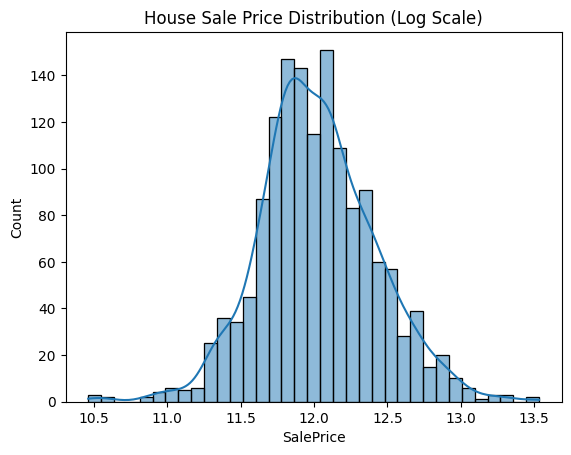

In [77]:
sns.histplot(np.log1p(train["SalePrice"]),kde=True)
plt.title('House Sale Price Distribution (Log Scale)')
plt.show()

## Categorical Feature Analysis

I examine categorical features to understand:

- The distribution of category levels (potential imbalance and rare categories)
- How different categories relate to the target (`SalePrice`)

Because there are many categorical variables, I focus on:
1) Category frequency patterns  
2) Relationship with `SalePrice` using both visualization and a statistical screening test (one-way ANOVA)

In [78]:
cat_cols = train.select_dtypes(include=["object"]).columns
len(cat_cols)

43

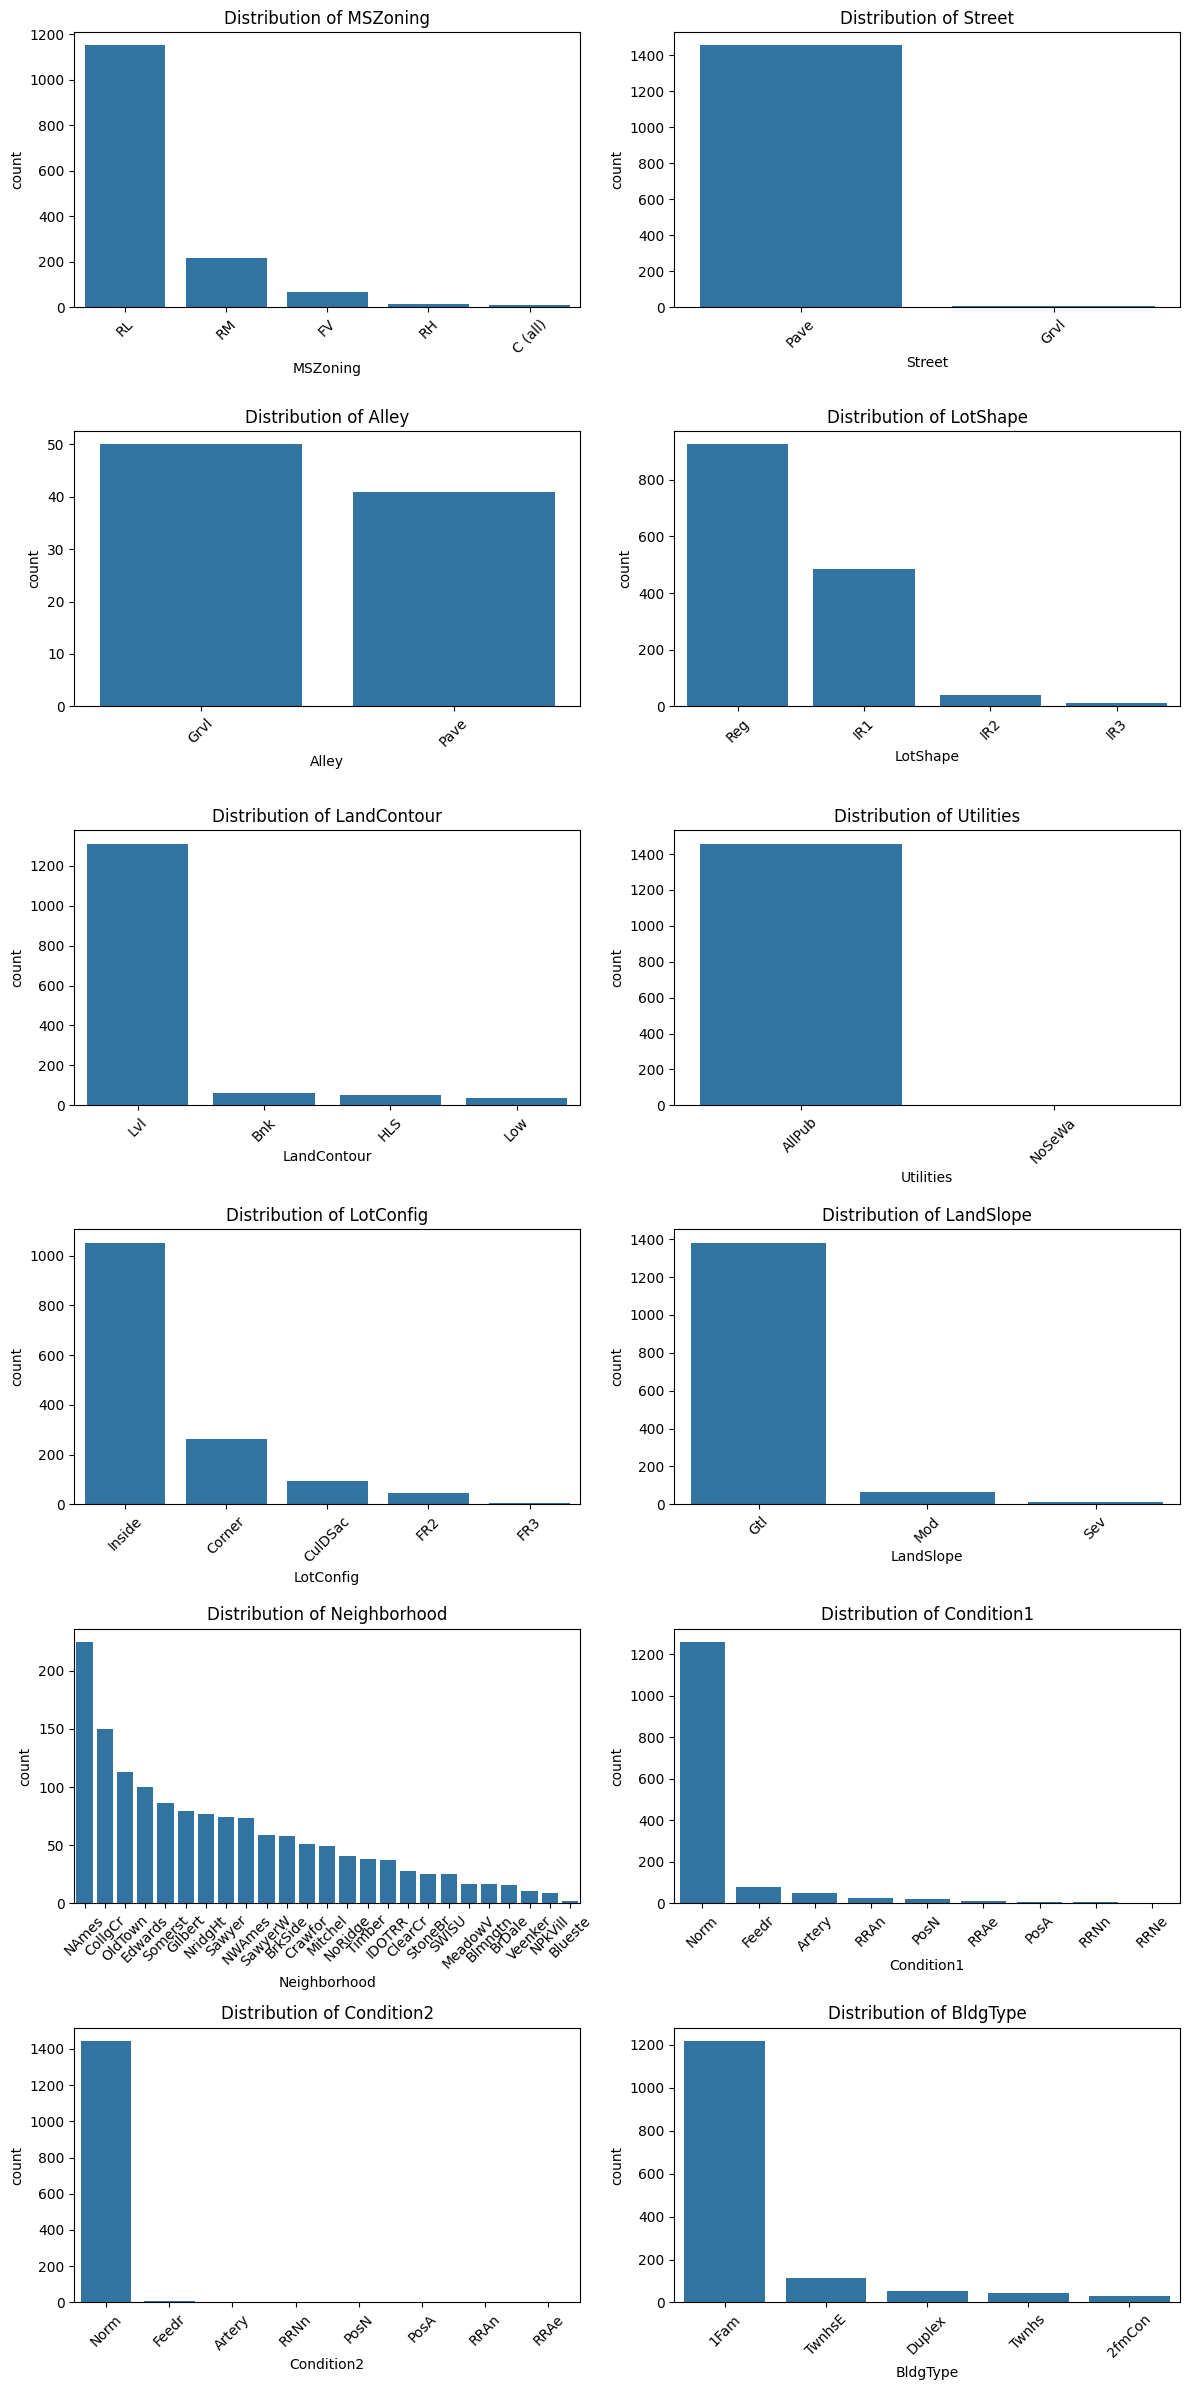

In [80]:
max_plots = 12
cols_to_plot = cat_cols[:max_plots]

n_cols = 2
n_rows = math.ceil(len(cols_to_plot) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    order = train[col].value_counts().index
    sns.countplot(data=train, x=col, ax=axes[i], order=order)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].tick_params(axis="x", rotation=45)

for j in range(len(cols_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

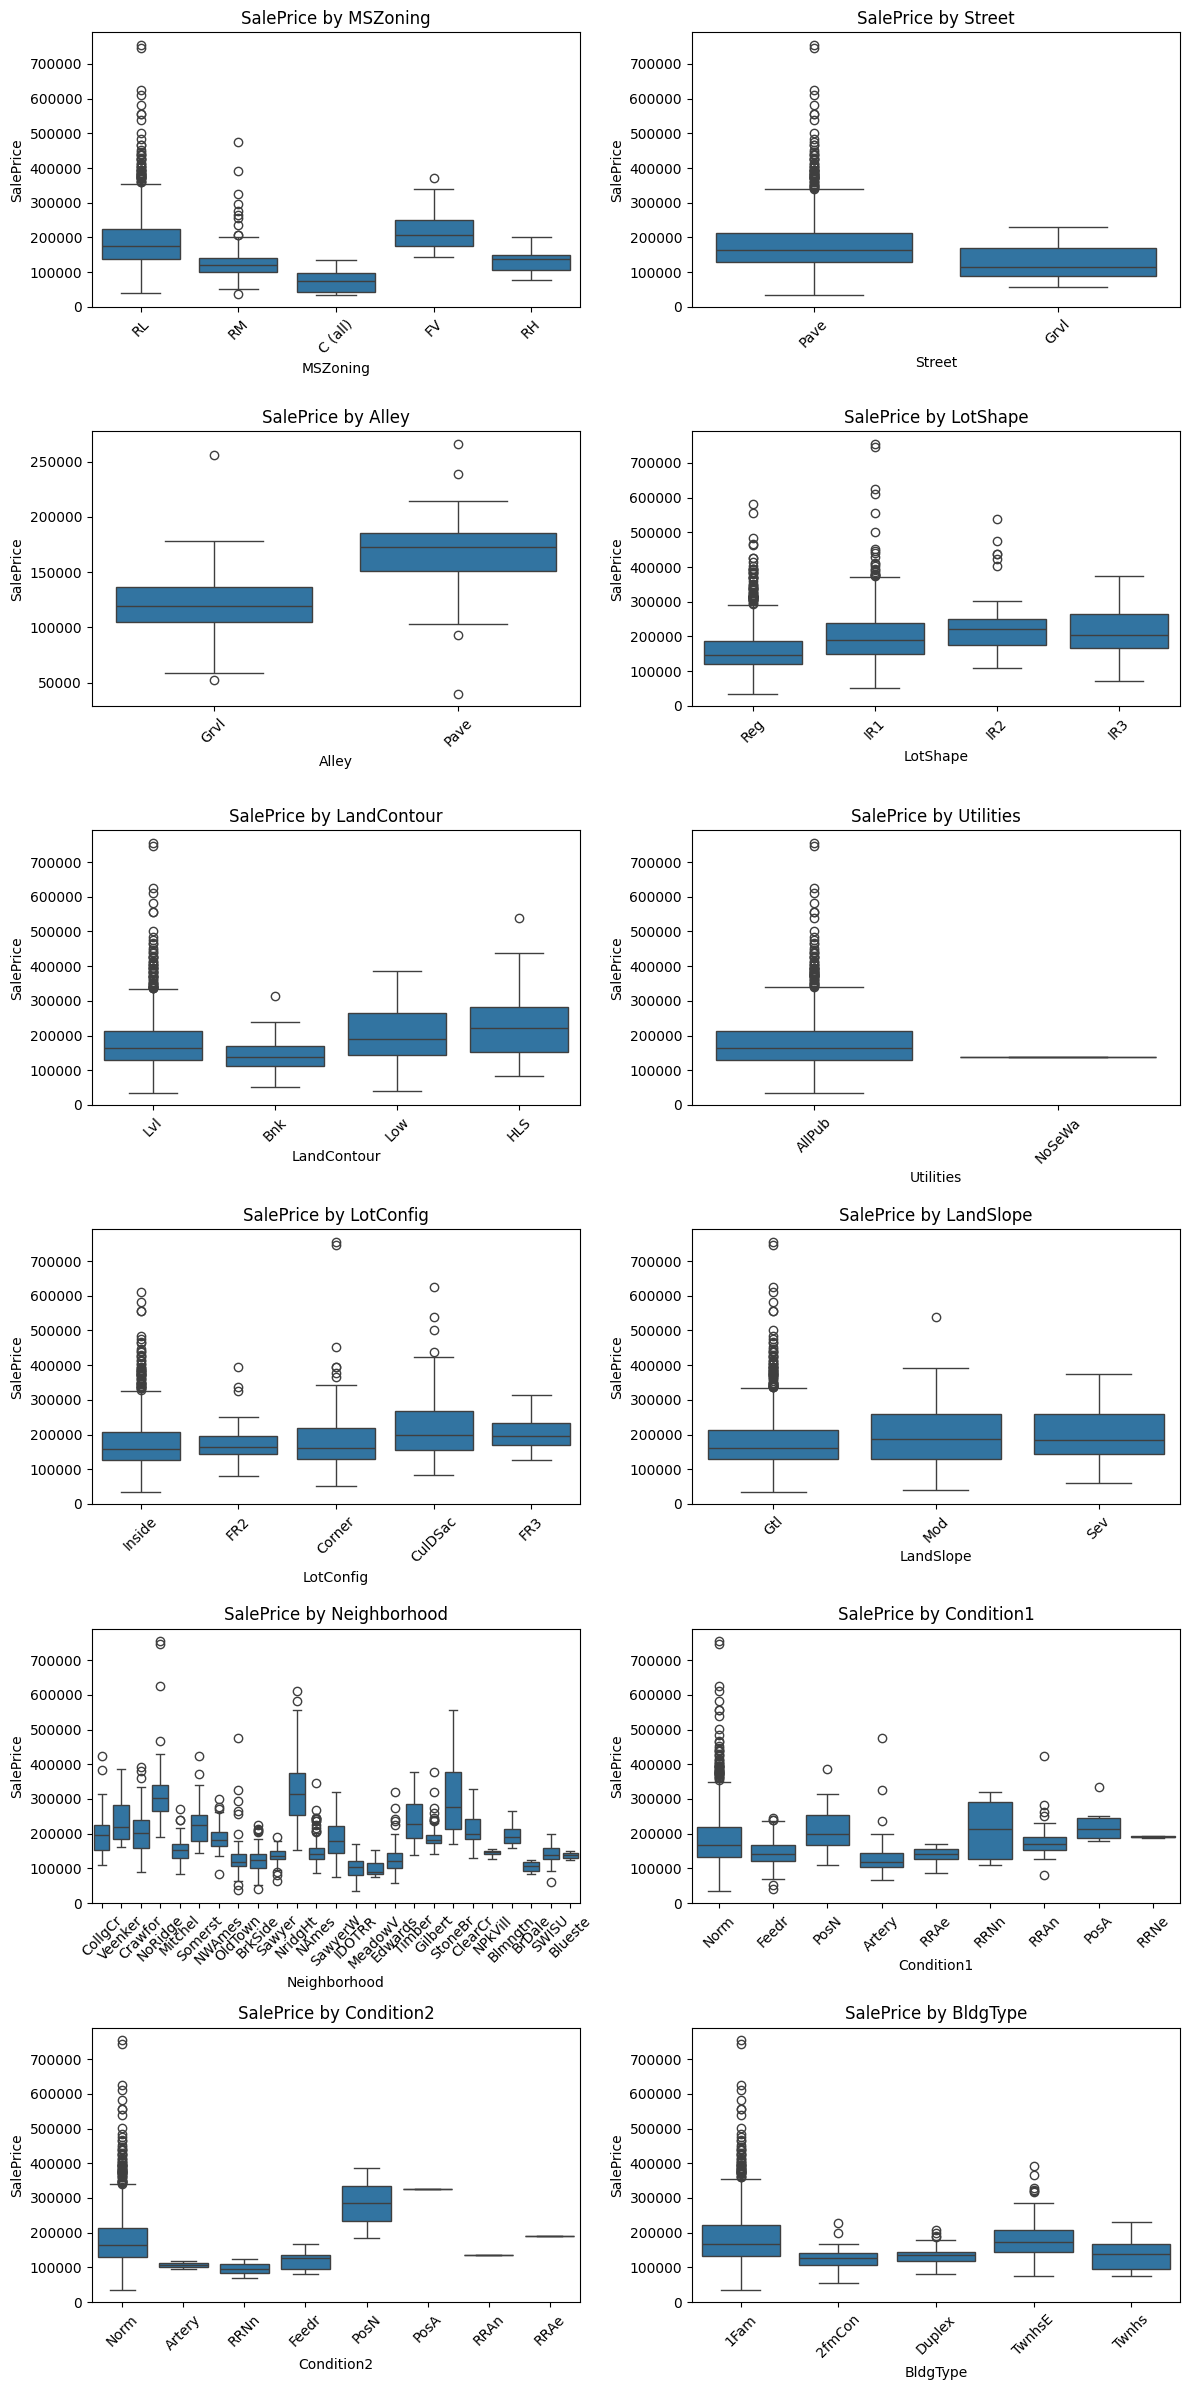

In [81]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    sns.boxplot(data=train, x=col, y="SalePrice", ax=axes[i])
    axes[i].set_title(f"SalePrice by {col}")
    axes[i].tick_params(axis="x", rotation=45)

for j in range(len(cols_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [82]:
from scipy import stats

anova_results = []

for col in cat_cols:
    groups = [
        grp["SalePrice"].dropna().values
        for _, grp in train.groupby(col)
        if grp["SalePrice"].notna().sum() > 1
    ]
    if len(groups) > 1:
        f_stat, p_val = stats.f_oneway(*groups)
        anova_results.append({"Feature": col, "F_Score": f_stat, "P_Value": p_val})

anova_df = pd.DataFrame(anova_results).sort_values("F_Score", ascending=False)
anova_df.head(20)

,Feature,F_Score,P_Value
17,ExterQual,443.334831,1.439551e-204
29,KitchenQual,407.806352,3.032213e-192
20,BsmtQual,392.913506,9.610615e-186
33,GarageFinish,250.962467,1.199117e-93
26,HeatingQC,117.281347,5.041729e-68
19,Foundation,100.253851,5.791895e-91
27,CentralAir,98.305344,1.809506e-22
7,Neighborhood,71.784865,1.558600e-225
32,GarageType,71.522123,1.247154e-66
22,BsmtExposure,70.887984,1.022671e-42


#### Statistical Screening (One-way ANOVA)

I use one-way ANOVA as a screening tool to identify categorical features whose group means
differ significantly in `SalePrice`. A higher F-score suggests a stronger association.
This test is not causal and should be interpreted alongside domain knowledge and modeling results.

In [83]:
imbalance_df = pd.DataFrame({
    "Feature": cat_cols,
    "Most_Freq_Ratio": [train[col].value_counts(normalize=True).iloc[0] for col in cat_cols]
})

analysis_df = anova_df.merge(imbalance_df, on="Feature", how="left")
analysis_df.head(20)

,Feature,F_Score,P_Value,Most_Freq_Ratio
0,ExterQual,443.334831,1.439551e-204,0.620548
1,KitchenQual,407.806352,3.032213e-192,0.503425
2,BsmtQual,392.913506,9.610615e-186,0.456079
3,GarageFinish,250.962467,1.199117e-93,0.438724
4,HeatingQC,117.281347,5.041729e-68,0.507534
5,Foundation,100.253851,5.791895e-91,0.443151
6,CentralAir,98.305344,1.809506e-22,0.934932
7,Neighborhood,71.784865,1.558600e-225,0.154110
8,GarageType,71.522123,1.247154e-66,0.630892
9,BsmtExposure,70.887984,1.022671e-42,0.670183


#### Category Imbalance Check

I compute the share of the most frequent category for each categorical feature.
Highly imbalanced features often contain rare categories that may require grouping
or careful encoding to reduce noise.

### Numerical Feature Analysis

I examine numerical features to understand:

- Distributional properties (skewness, spread, anomalies)
- Potential outliers
- Relationships with the target variable (`SalePrice`)

Given the large number of numerical variables, I focus on a subset
for visualization while relying on summary statistics for global assessment.

In [84]:
num_cols = train.select_dtypes(exclude=["object"]).columns
len(num_cols)

38

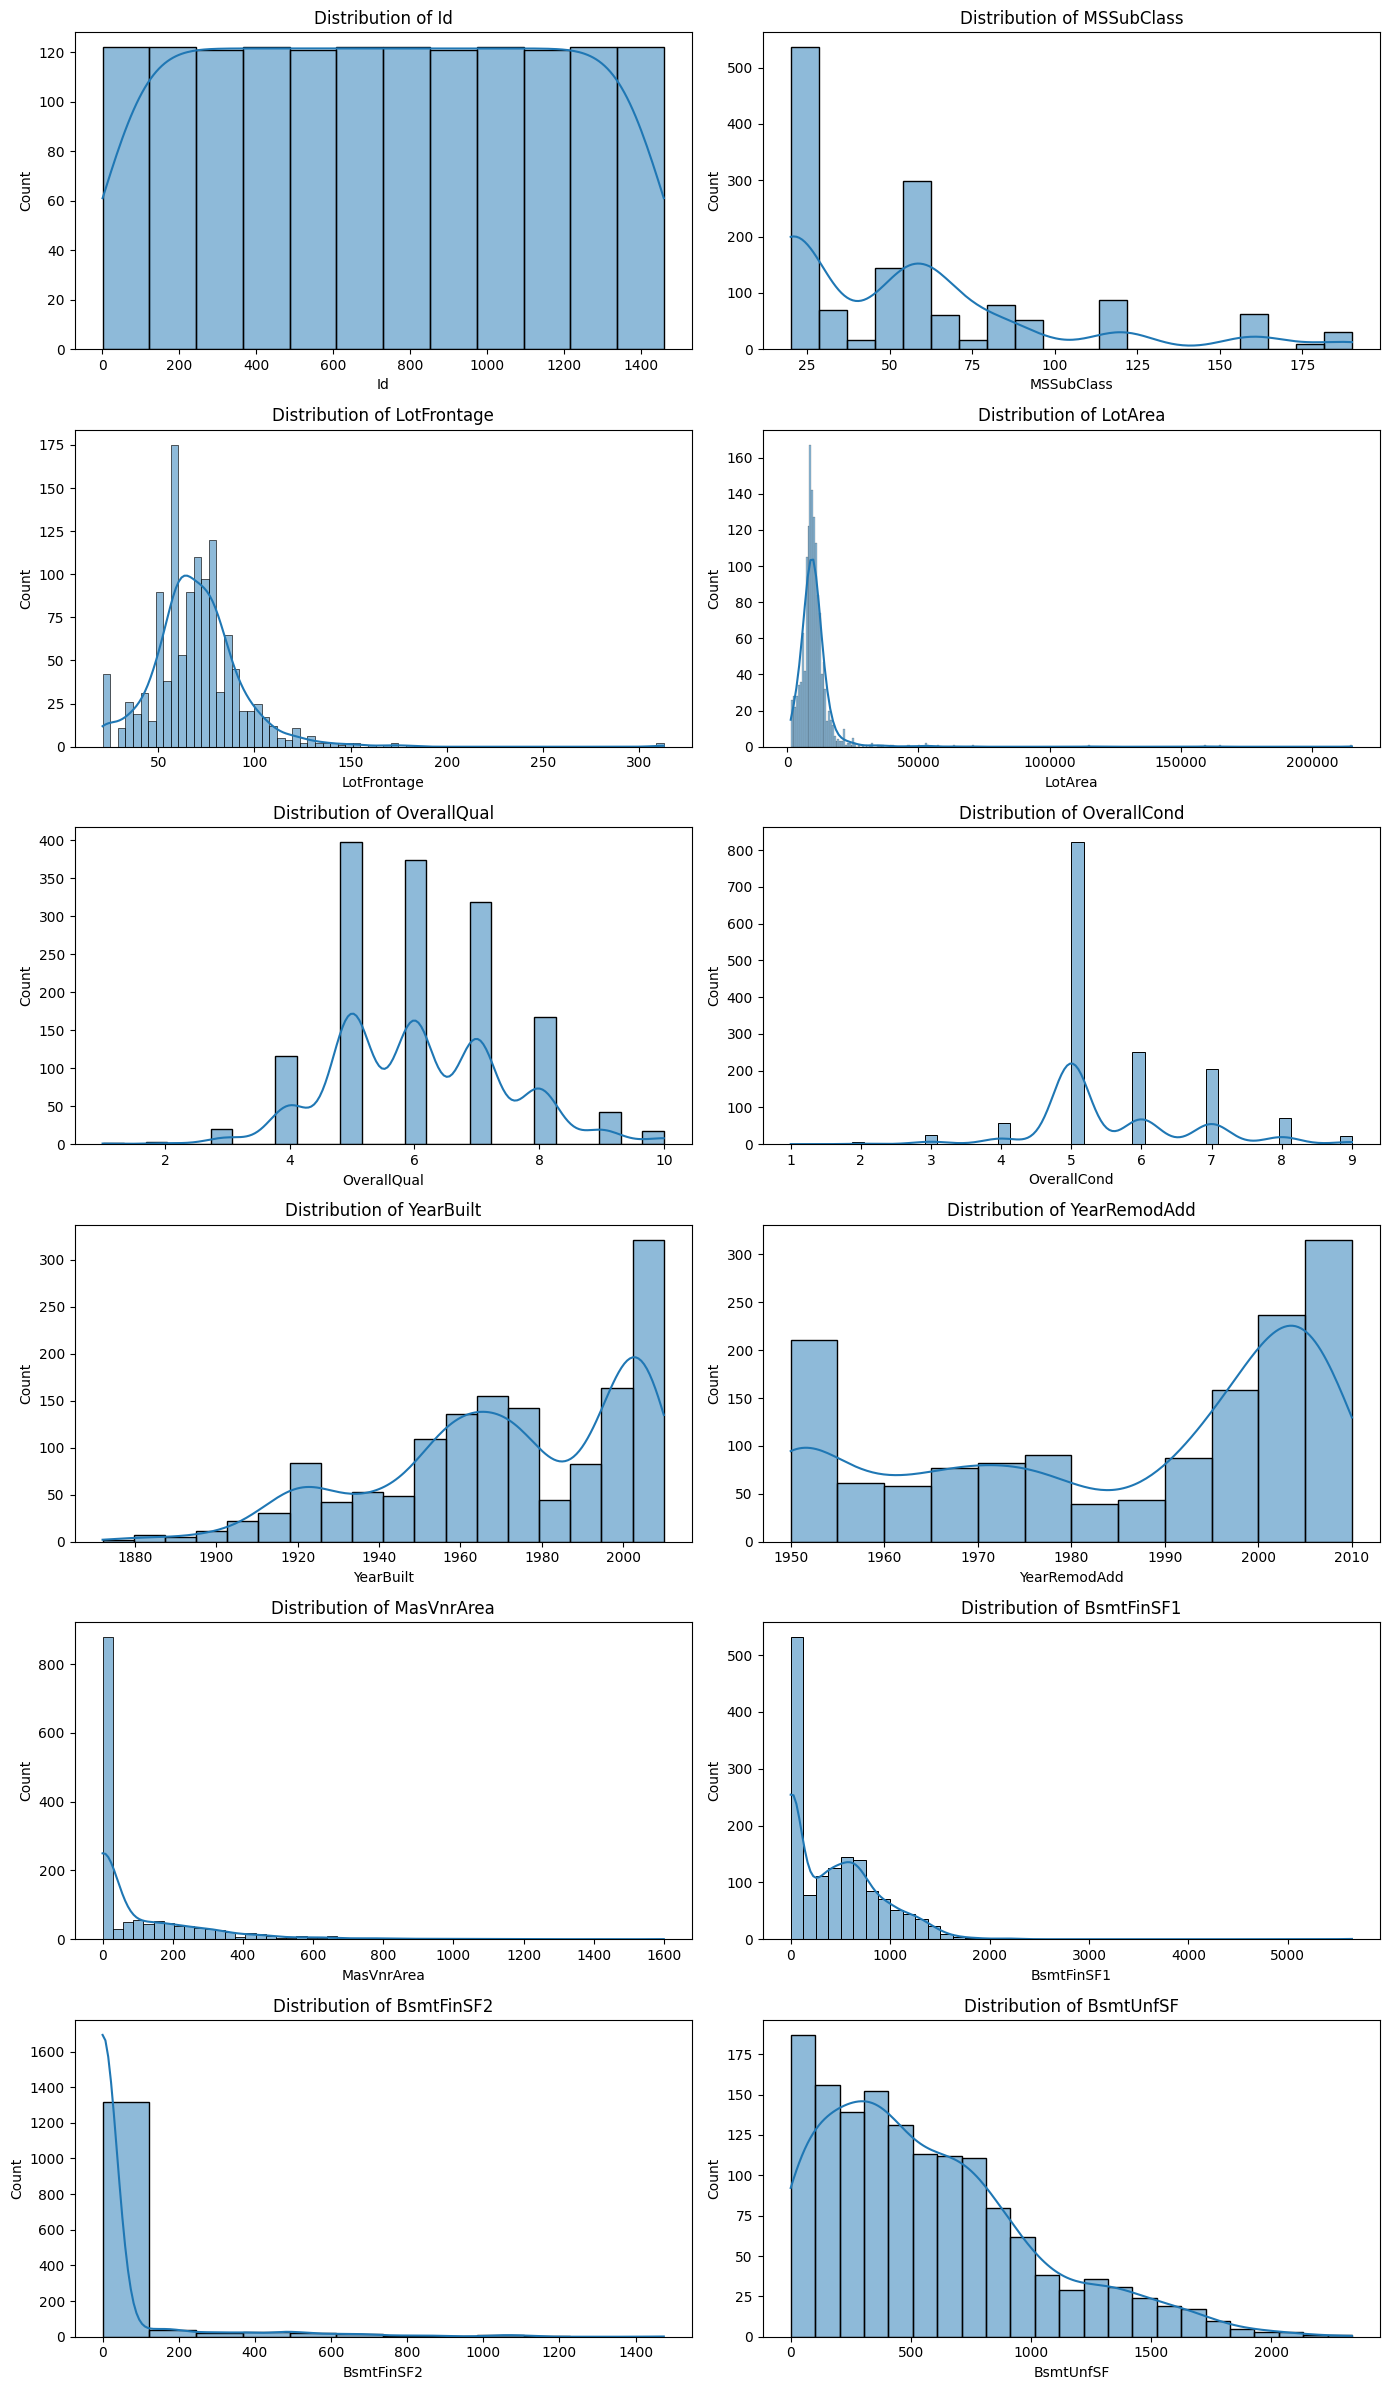

In [85]:
max_plots = 12
cols_to_plot = num_cols[:max_plots]

n_cols = 2
n_rows = math.ceil(len(cols_to_plot) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 7, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    sns.histplot(train[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

for j in range(len(cols_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

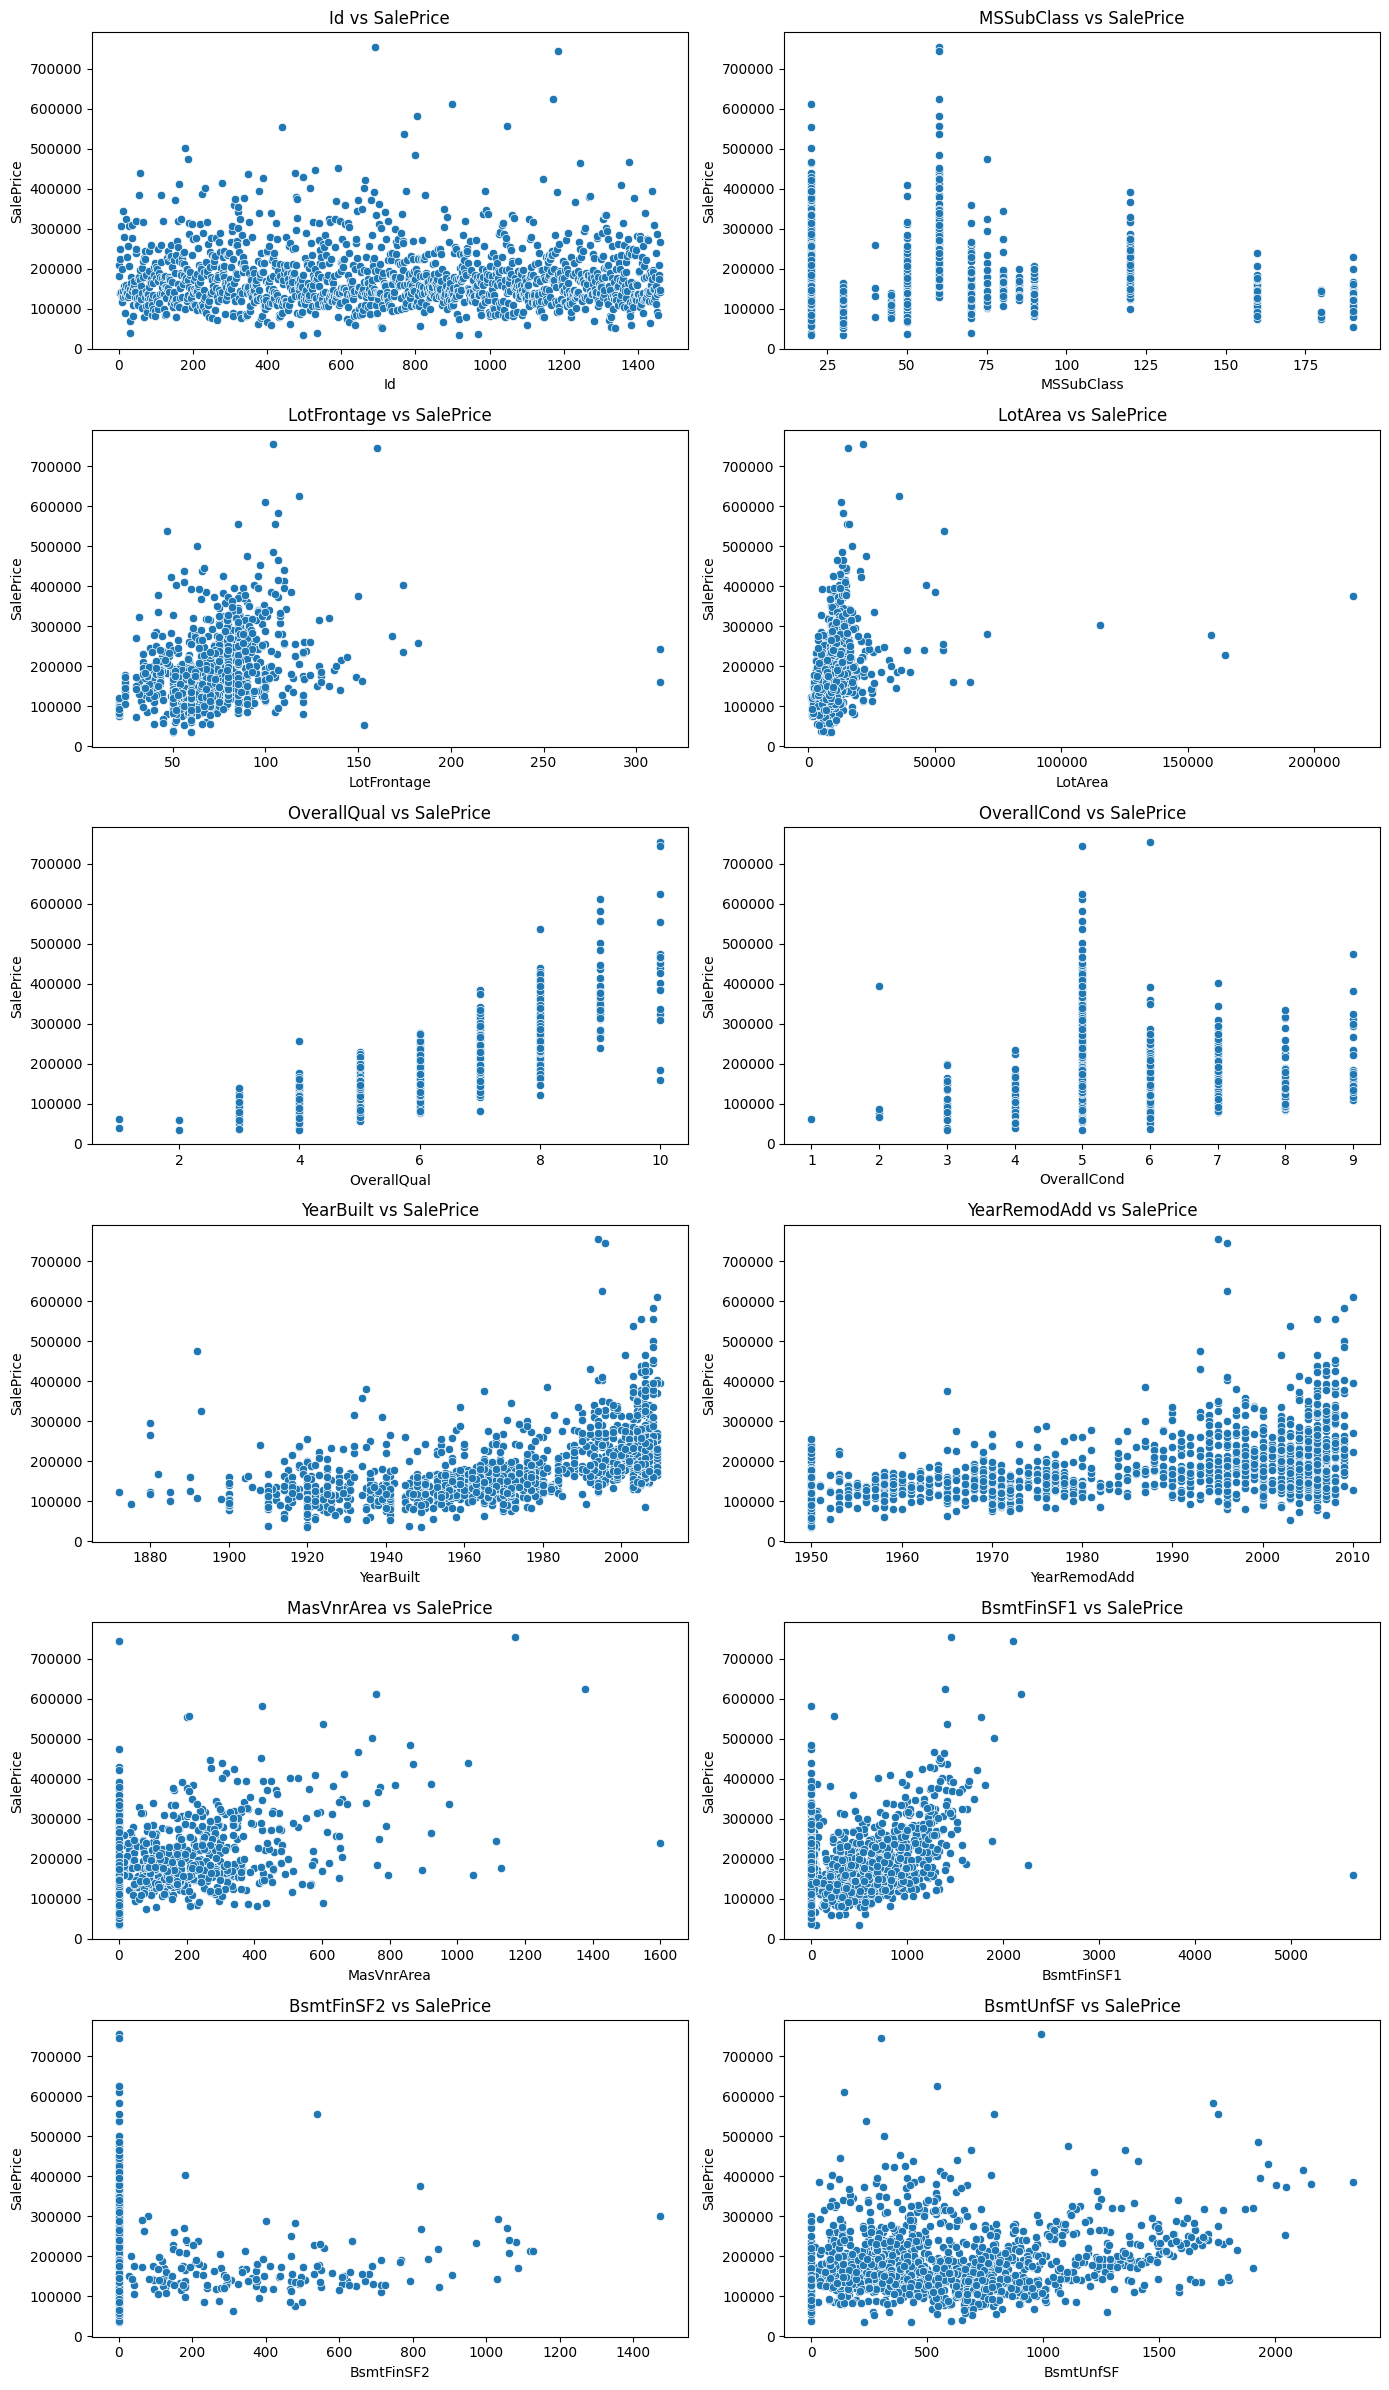

In [86]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 7, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    sns.scatterplot(data=train, x=col, y="SalePrice", ax=axes[i])
    axes[i].set_title(f"{col} vs SalePrice")

for j in range(len(cols_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The scatterplots highlight both linear and nonlinear relationships
between numerical predictors and SalePrice. Several features show
clear positive associations, suggesting strong predictive potential.

## Correlation Analysis

I analyze correlations among numerical features to identify variables
most strongly associated with the target (`SalePrice`).

This step helps:

- Detect linear relationships
- Guide feature selection
- Prioritize variables for deeper inspection

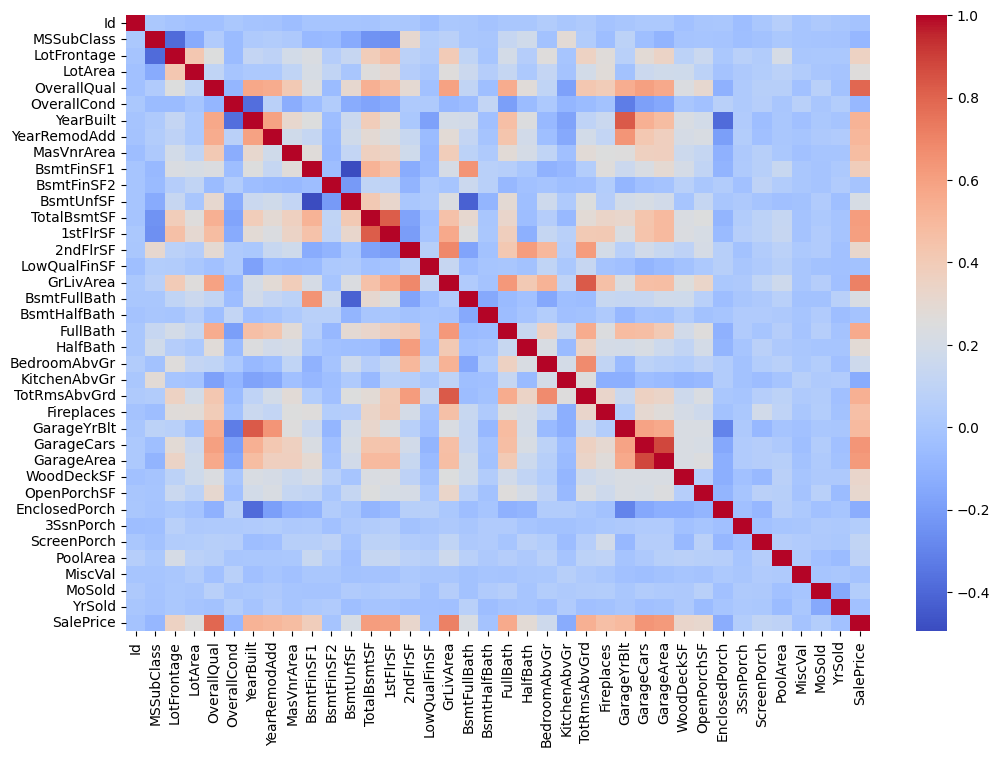

In [23]:
num_fea=train.select_dtypes(exclude=['object'])
corr=num_fea.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=False,cmap='coolwarm')

plt.show()

In [90]:
top_features = (
    corr["SalePrice"]
    .sort_values(ascending=False)
    .head(21)  
    .index
)

top_features

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath',
       'LotArea'],
      dtype='object')

In [91]:
data_top = train[top_features]
data_top.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   int64  
 1   OverallQual   1460 non-null   int64  
 2   GrLivArea     1460 non-null   int64  
 3   GarageCars    1460 non-null   int64  
 4   GarageArea    1460 non-null   int64  
 5   TotalBsmtSF   1460 non-null   int64  
 6   1stFlrSF      1460 non-null   int64  
 7   FullBath      1460 non-null   int64  
 8   TotRmsAbvGrd  1460 non-null   int64  
 9   YearBuilt     1460 non-null   int64  
 10  YearRemodAdd  1460 non-null   int64  
 11  GarageYrBlt   1379 non-null   float64
 12  MasVnrArea    1452 non-null   float64
 13  Fireplaces    1460 non-null   int64  
 14  BsmtFinSF1    1460 non-null   int64  
 15  LotFrontage   1201 non-null   float64
 16  WoodDeckSF    1460 non-null   int64  
 17  2ndFlrSF      1460 non-null   int64  
 18  OpenPorchSF   1460 non-null 

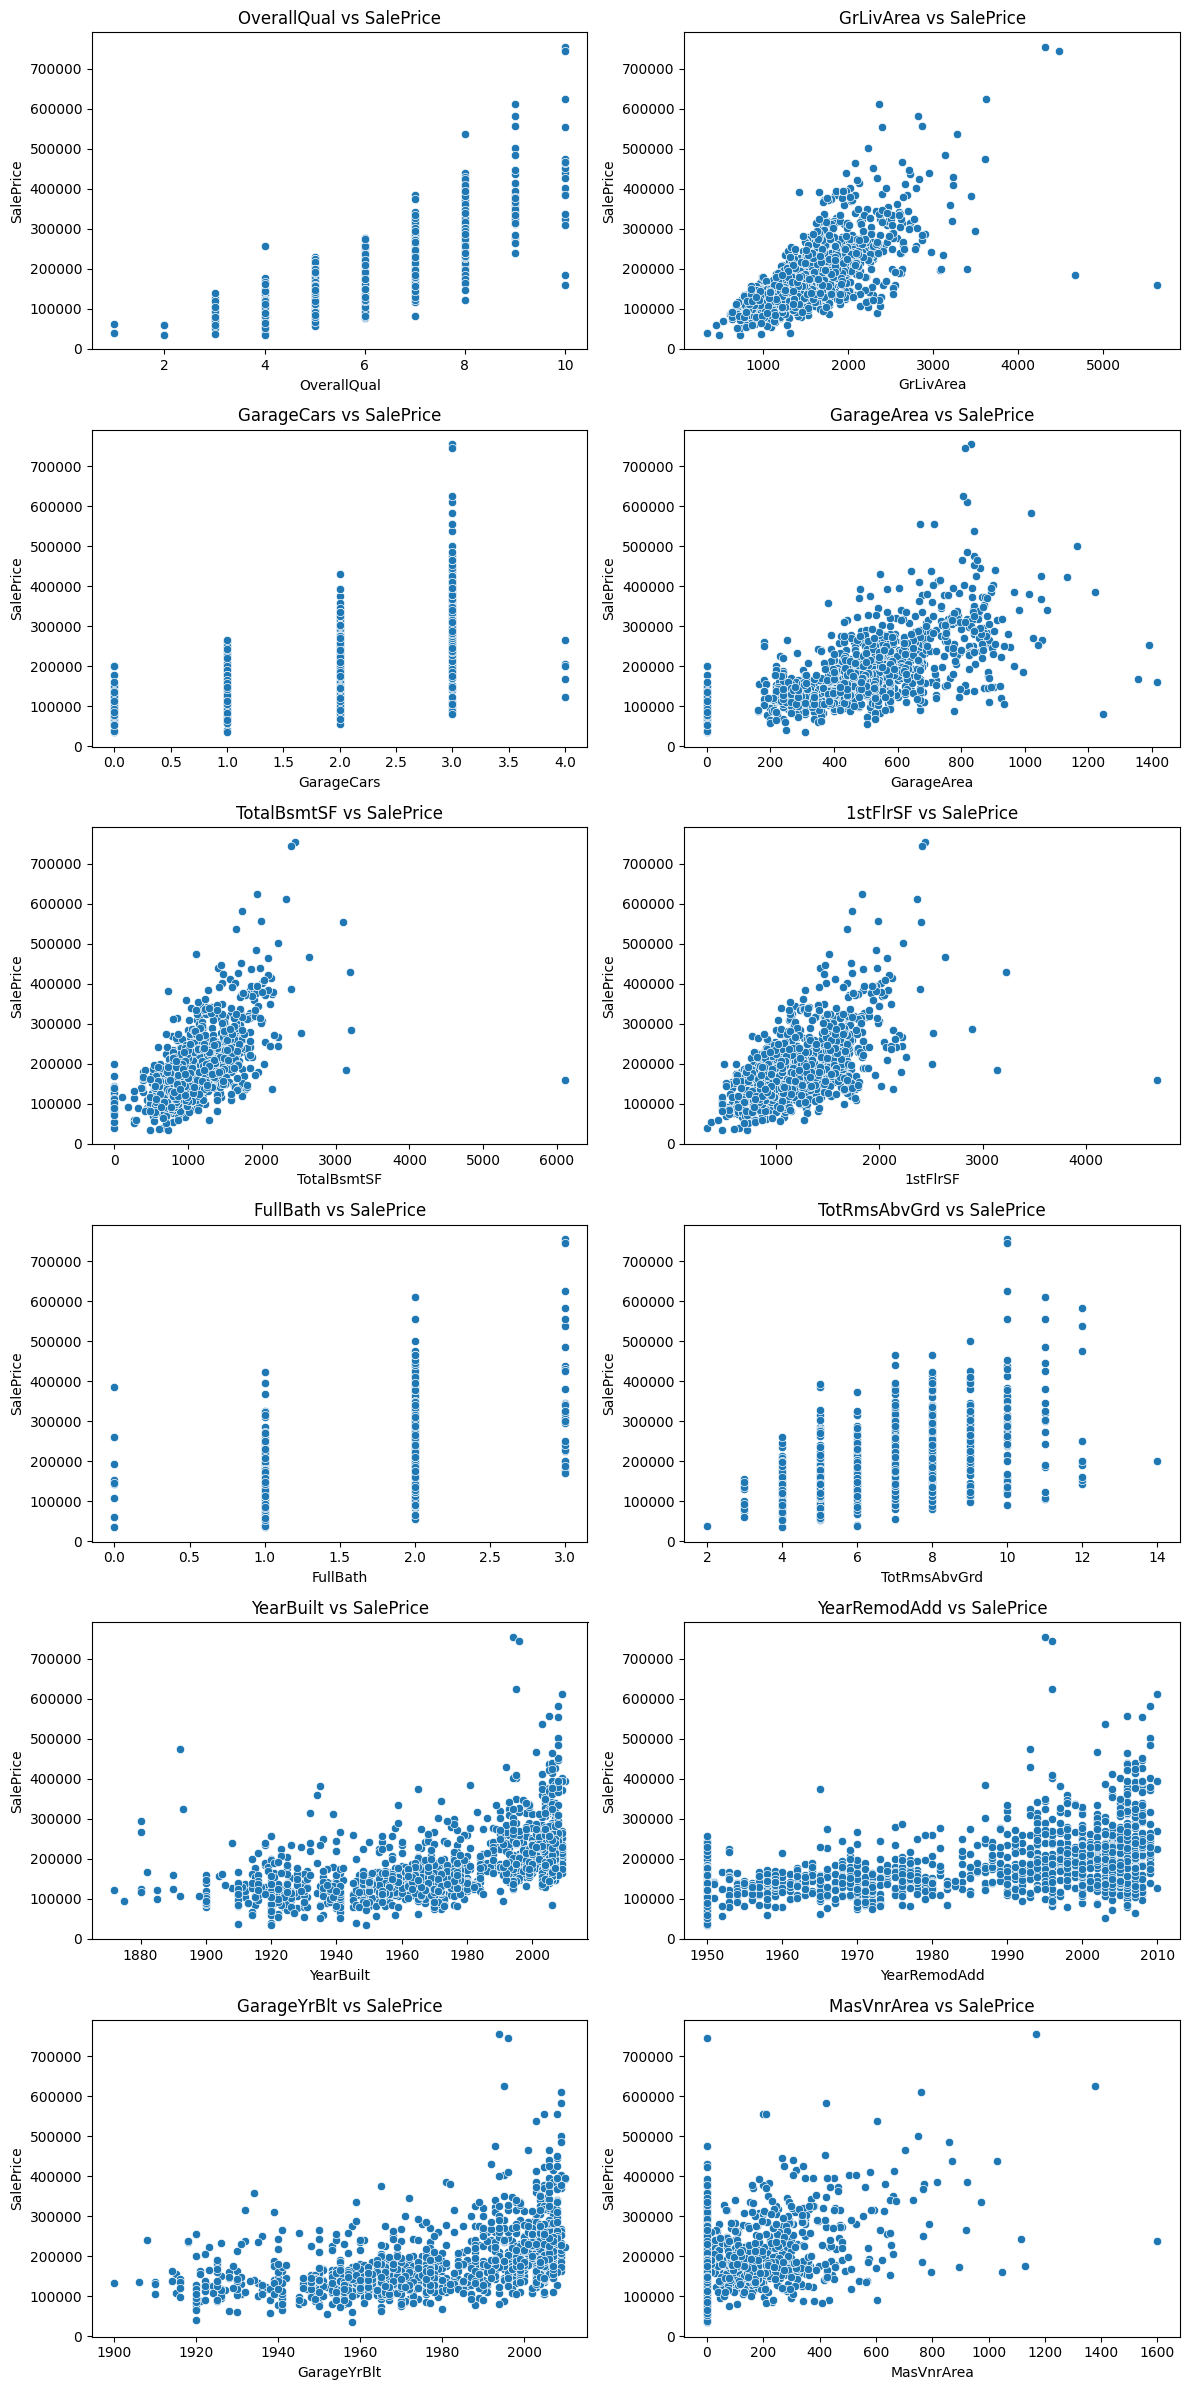

In [92]:
predictors = data_20.drop("SalePrice", axis=1).columns
max_plots = 12
cols_to_plot = predictors[:max_plots]

n_cols = 2
n_rows = math.ceil(len(cols_to_plot) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    sns.scatterplot(data=data_top, x=col, y="SalePrice", ax=axes[i])
    axes[i].set_title(f"{col} vs SalePrice")

for j in range(len(cols_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

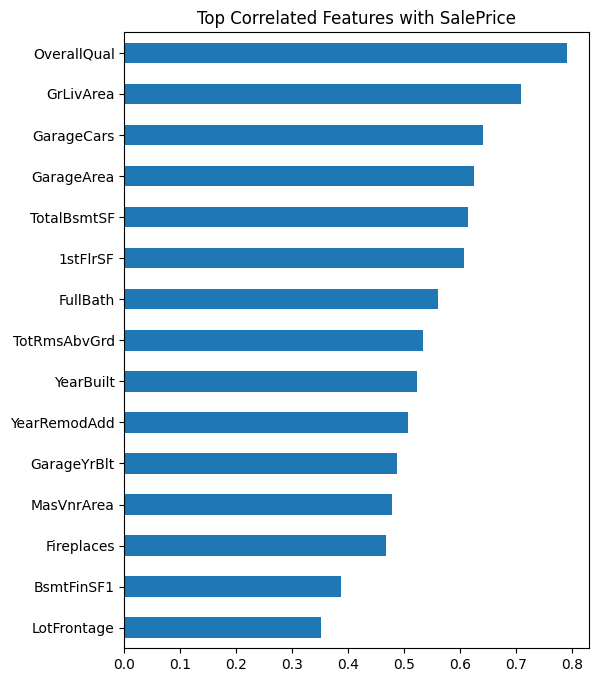

In [94]:
corr_target = corr["SalePrice"].drop("SalePrice").sort_values()

plt.figure(figsize=(6, 8))
corr_target.tail(15).plot(kind="barh")
plt.title("Top Correlated Features with SalePrice")
plt.show()

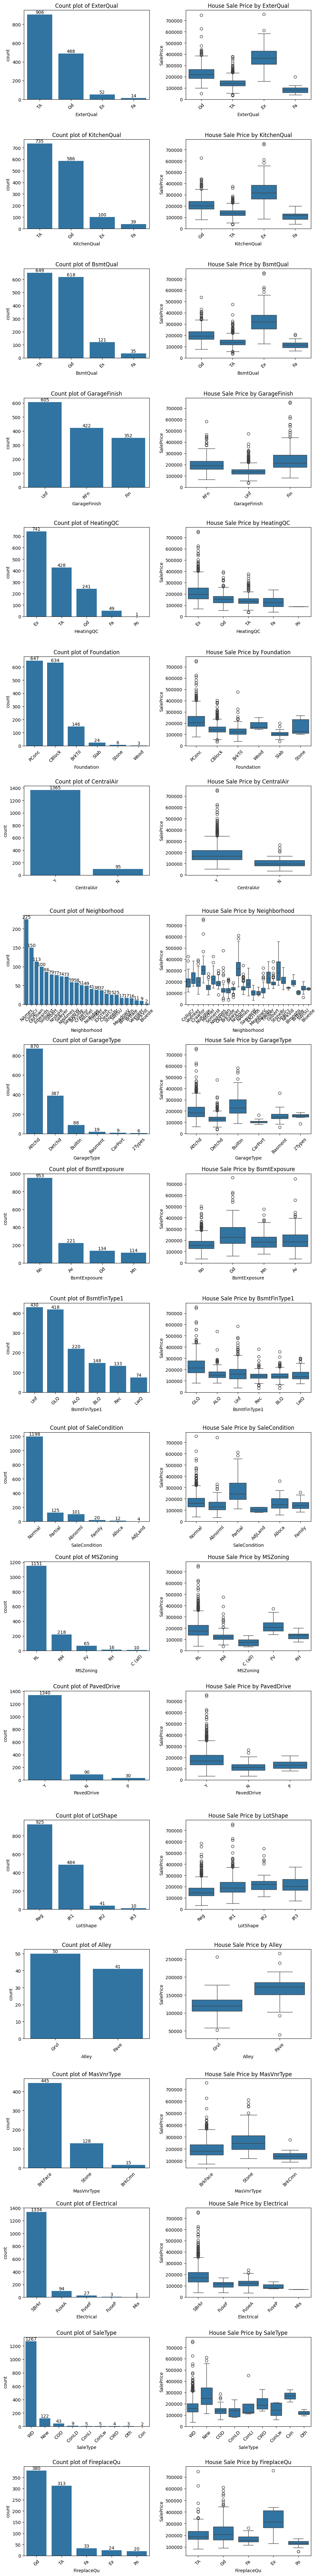

In [96]:
num_20=list(analysis_df['Feature'].head(20))

n_rows = len(num_20)
n_cols = 2

fig_cat_comb,axes_cat_comb=plt.subplots(n_rows,n_cols,figsize=(n_cols*5,n_rows*4))

for i,col in enumerate(num_20):
    sns.countplot(data=train,x=col, ax=axes_cat_comb[i,0], order=train[col].value_counts().index)
    axes_cat_comb[i,0].set_title(f'Count plot of {col}')
    axes_cat_comb[i,0].tick_params(axis='x', rotation=45)
    
    # mark the labels
    for container in axes_cat_comb[i,0].containers:
        axes_cat_comb[i,0].bar_label(container)
    
    sns.boxplot(x=col,y='SalePrice',data=train,ax=axes_cat_comb[i,1])
    axes_cat_comb[i,1].set_title(f'House Sale Price by {col}')
    axes_cat_comb[i,1].tick_params(axis='x',rotation=45)  

plt.tight_layout()
plt.show()


### Feature Selection Strategy

Based on correlation analysis and categorical feature screening,
I prioritize the top features most strongly associated with SalePrice.

Features with weak correlation are not explicitly transformed,
as their contribution is expected to be limited.

#### Feature Adjustments

1. **Columns removed**

The following features are removed due to extreme imbalance
or limited predictive value:

- Street  
- Utilities  
- CentralAir  

Highly imbalanced features may introduce noise and increase
the risk of overfitting.

2. **Rare category grouping**

I inspected the top categorical features (ranked by ANOVA F-score) using:

- Countplots to check category frequency and detect rare levels
- Boxplots to assess whether categories show stable and meaningful separation in `SalePrice`

Several features contain categories with very few observations (strong imbalance).
For these rare levels, the boxplots often show unstable or noisy price distributions
due to limited sample size, and they do not consistently separate high- vs low-price homes.

Because rare levels create sparse columns after one-hot encoding and may increase
the risk of overfitting, I group infrequent categories into an `Other` label to
improve model stability and generalization.

## Data Preprocessing

### Handling Missing Values

I handle missing values using domain-aware rules rather than a single global strategy.

1) Missing values that represent the absence of a feature are imputed with explicit values:
- Categorical: impute `"None"` (e.g., missing basement/garage/fireplace quality indicates the feature does not exist)
- Numerical: impute `0` for variables where missingness indicates absence (e.g., masonry veneer area)

2) Missing values where the absence does not have a clear semantic meaning are imputed using a robust statistic:
- `LotFrontage` is imputed with the median, since this feature is skewed and may contain outliers.

3) For rare cases with very few missing rows, I drop those rows (e.g., `Electrical`) to avoid introducing noise.

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

In [98]:
X = train.drop(columns=["SalePrice"])
y = train["SalePrice"]

test = pd.read_csv('test.csv')

In [32]:
# remove low-information or highly imbalanced features within the preprocessing
# pipeline, ensuring reproducible and leakage-free feature selection.
class drop_low_info_cols(BaseEstimator, TransformerMixin):

    def __init__(self, cols):  
        self.cols = cols

    def fit(self, X, y=None): 
        return self

    def transform(self, X):    
        return X.drop(columns=self.cols,axis=1)

In [33]:
lot_col=['LotFrontage']

num_cols = X_train.select_dtypes(include="number").columns
num_cols_notlot=[]
for col in num_cols:
    if col != 'LotFrontage':
        num_cols_notlot.append(col)
    
cat_cols = X_train.select_dtypes(exclude="number").columns

low_info_cols=['Street', 'Utilities', 'CentralAir','Id']

### Grouping Rare Categorical Levels

Some categorical features contain rare levels with very few observations.
These levels can create sparse one-hot encoded columns and increase the risk
of overfitting.

I group infrequent levels into an `"Other"` category based on frequency
(threshold-based grouping). This reduces sparsity and improves model stability.

In [114]:
class group_rare_labels(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.02, other_label="Other", columns=None):
        self.threshold = threshold
        self.other_label = other_label
        self.columns = columns  # MUST be provided when used inside ColumnTransformer

    def fit(self, X, y=None):
        if self.columns is None:
            raise ValueError("GroupRareLabels(columns=...) must be provided when used inside ColumnTransformer.")

        # Ensure DataFrame with correct column names
        X_df = pd.DataFrame(X, columns=self.columns) if not isinstance(X, pd.DataFrame) else X[self.columns].copy()

        self.rare_map_ = {}
        for col in self.columns:
            freq = X_df[col].value_counts(normalize=True, dropna=False)
            self.rare_map_[col] = freq[freq < self.threshold].index.tolist()

        return self

    def transform(self, X):
        X_df = pd.DataFrame(X, columns=self.columns) if not isinstance(X, pd.DataFrame) else X[self.columns].copy()

        for col in self.columns:
            X_df[col] = X_df[col].replace(self.rare_map_[col], self.other_label)

        return X_df.values

### Ordinal Encoding + One-Hot Encoding

In [115]:
from sklearn.preprocessing import OrdinalEncoder

ord_cols=['BsmtQual','KitchenQual','FireplaceQu','ExterQual','HeatingQC']
cat_cols_other = [c for c in cat_cols if c not in ord_cols]
ord_categories = [['None','NA','Po','Fa','TA','Gd','Ex']]

ord_encoder = OrdinalEncoder(
    categories=ord_categories * len(ord_cols),
    handle_unknown="use_encoded_value",
    unknown_value=-1
)

# Setting Pipelines
### Why Pipelines?

Machine learning pipelines ensure that all preprocessing steps 
(imputation, encoding, scaling) are applied consistently during 
training and validation. 

This prevents data leakage, improves reproducibility, and guarantees 
that transformations learned from training data are correctly applied 
to unseen data.

In [342]:
ord_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="None")),
    ("ordinal", ord_encoder),
    ("scaler", StandardScaler())
])

ord_pipe_tree = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="None")),
    ("ordinal", ord_encoder),
])

In [343]:
cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="None")),
    ("rare_group", group_rare_labels(threshold=0.02, other_label="Other", columns=cat_cols_other)),  
    ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ("scaler", StandardScaler(with_mean=False))
])

cat_pipe_tree = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="None")),
    ("rare_group", group_rare_labels(threshold=0.02, other_label="Other", columns=cat_cols_other)),  
    ("onehot", OneHotEncoder(handle_unknown="ignore")),
])

In [344]:
num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value=0)),
    ("scaler", StandardScaler())
])

num_pipe_tree = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value=0)),
])

In [345]:
lot_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

lot_pipe_tree = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
])

In [346]:
col_trans = ColumnTransformer(
    transformers=[
        ("drop_low", "drop", low_info_cols),
        # LotFrontage: use median (true missing value)
        ("lotfrontage", lot_pipe, lot_col),

        # Other numerical features: missing means "absence" → fill with 0
        ("num_zero", num_pipe, num_cols_notlot),

        # ordinal categorical columns
        ("ord", ord_pipe, ord_cols),

        # other categorical columns
        ("cat", cat_pipe, cat_cols_other),
    ],
    remainder="drop"
)

col_trans_tree = ColumnTransformer(
    transformers=[
        ("drop_low", "drop", low_info_cols),
        # LotFrontage: use median (true missing value)
        ("lotfrontage", lot_pipe_tree, lot_col),

        # Other numerical features: missing means "absence" → fill with 0
        ("num_zero", num_pipe_tree, num_cols_notlot),

        # ordinal categorical columns
        ("ord", ord_pipe_tree, ord_cols),

        # other categorical columns
        ("cat", cat_pipe_tree, cat_cols_other),
    ],
    remainder="drop"
)

# Models Configuration

## Modeling Strategy

I evaluate multiple model families to compare:

- Linear vs nonlinear assumptions
- Parametric vs nonparametric approaches
- Bias–variance trade-offs

This ensures that model selection is driven by empirical performance
rather than algorithm preference.

## Regularized Linear Models

I begin with regularized linear models as interpretable baselines.

The dataset contains many correlated predictors, especially after
categorical encoding. Regularization helps stabilize coefficients,
control variance, and improve generalization.

These models provide a transparent benchmark for evaluating gains
from more complex ensemble and boosting approaches.

### Models Evaluated

- Ridge Regression (L2 regularization)
- Lasso Regression (L1 regularization)
- ElasticNet (combined L1/L2)

Hyperparameters are selected using cross-validation.

In [121]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

ridge_model = RidgeCV(
    alphas=np.logspace(-4, 4, 200)
    , cv=5
    , scoring="neg_mean_squared_error"
)

lasso_model = LassoCV(
    alphas=np.logspace(-5, -1, 200),
    cv=5,
    max_iter=50000,
    random_state=42
)

elasticnet_model = ElasticNetCV(
    l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
    alphas=np.logspace(-5, 0, 200),   
    cv=5,
    max_iter=50000,
    random_state=42
)

## Random Forest

Random Forest is an ensemble learning method that combines multiple
decision trees trained on bootstrapped samples of the data.

I include Random Forest to:

- Capture nonlinear relationships
- Model complex feature interactions
- Reduce overfitting through bagging and feature randomness
- Provide a strong nonparametric benchmark

Unlike linear models, Random Forest does not assume linearity
or feature independence, making it well-suited for structured
tabular datasets such as House Prices.

Model performance is evaluated using cross-validated RMSE.

In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    "n_estimators": [200, 500, 800, 1000],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10,15,20],
    "min_samples_leaf": [2,5,8,10]
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

# Gradient Boosting Trees

Boosting models effectively capture nonlinearities and feature interactions for better predictive performance.

## Gradient Boosting

Gradient Boosting is an ensemble technique that builds trees sequentially,
where each new tree corrects the errors made by previous models.

I use Gradient Boosting to:

- Capture complex nonlinear relationships
- Model feature interactions
- Improve predictive accuracy through iterative error correction

Compared to Random Forest, boosting focuses on reducing bias by
learning difficult patterns progressively.

Performance is evaluated using cross-validated RMSE.

In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid_gb = {
    "n_estimators": [200, 500, 800, 1200],
    "learning_rate": [0.01, 0.03, 0.05, 0.1],
    "max_depth": [2, 3, 4, 5],
    "min_samples_leaf": [1, 5, 10, 20],
    "subsample": [0.6, 0.8, 1.0],
    "max_features": ["sqrt", "log2", None]
}

grid_gb = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid=param_grid_gb,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

## XGBoost

XGBoost (Extreme Gradient Boosting) is an optimized gradient boosting
framework designed for efficiency and regularization.

I include XGBoost because it:

- Handles nonlinearities and interactions effectively
- Incorporates built-in regularization
- Provides strong predictive performance on tabular data
- Offers computational optimizations

XGBoost often performs well in structured regression problems
such as house price prediction.

Model quality is measured using cross-validated RMSE.

In [449]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

xgb = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_jobs=1,
    tree_method="hist",
)

param_grid_xgb = {
    "n_estimators": [1200, 2000, 3000],
    "learning_rate": [0.02, 0.03, 0.05],
    "max_depth": [2, 3, 4, 5],
    "min_child_weight": [1, 3, 5, 10],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.05, 0.1],
    "reg_alpha": [0.0, 0.01, 0.1],
    "reg_lambda": [1.0, 3.0, 10.0],
}

rand_xgb = RandomizedSearchCV(
    xgb,
    param_distributions=param_grid_xgb,
    n_iter=60, 
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    random_state=42,
    verbose=1
)

## LightGBM

LightGBM is a gradient boosting framework optimized for speed and
memory efficiency, particularly on large or high-dimensional datasets.

I use LightGBM to:

- Improve computational efficiency
- Capture nonlinear feature relationships
- Handle high-dimensional encoded features
- Achieve strong predictive accuracy

LightGBM’s leaf-wise tree growth strategy can reduce loss faster
than level-wise growth used in traditional boosting methods.

Performance is evaluated using cross-validated RMSE.

In [327]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor(
    objective="regression",
    random_state=42,
    n_jobs=-1,
    verbose=1,
    verbosity = -1
)

param_grid_lgb = {
    "num_leaves": [31, 63, 90, 127],
    "max_depth": [-1, 3, 4, 5, 6],
    "learning_rate": [0.01, 0.015, 0.02, 0.03],
    "n_estimators": [1200, 1800, 2400, 3000],
    "min_child_samples": [10, 20, 30, 50, 80],
    "min_child_weight": [0.001, 0.01, 0.1, 1.0],
    "subsample": [0.6, 0.8, 1.0],
    "subsample_freq": [1, 5],
    "colsample_bytree": [0.7, 0.85, 1.0],
    "reg_alpha": [0.0, 0.001, 0.01, 0.1],
    "reg_lambda": [0.5, 1.0, 2.0, 3.0],
}

rand_lgb = RandomizedSearchCV(
    lgb,
    param_distributions=param_grid_lgb,
    n_iter=60, 
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Modeling

I construct an end-to-end modeling pipeline that integrates preprocessing
and model training.

All transformations — including missing value imputation, rare label grouping,
encoding, scaling, and feature removal — are applied using `Pipeline`
and `ColumnTransformer`. This design ensures:

- Consistent preprocessing across folds
- Prevention of data leakage
- Reproducible training and validation

For model selection, I adopt a two-stage hyperparameter tuning strategy:
a broad randomized search followed by targeted refinement.

## Stage 1: Randomized Hyperparameter Search

I begin with `RandomizedSearchCV` to efficiently explore a broad
hyperparameter space.

Randomized search samples parameter combinations instead of exhaustively
evaluating every possibility, which:

- Reduces computational cost
- Allows wider parameter exploration
- Identifies promising regions of the search space

This stage establishes a strong baseline configuration for XGBoost.

In [450]:
final_pipe = Pipeline(steps=[
    ("preprocess", col_trans_tree),
    # modify this parameter for different models
    ("model", rand_xgb)
])

In [451]:
from sklearn.compose import TransformedTargetRegressor

final_model = TransformedTargetRegressor(
    regressor=final_pipe,
    func=np.log1p,        
    inverse_func=np.expm1 
)

In [452]:
final_model.fit(X,y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=Pipeline(steps=[('preprocess',
                                                      ColumnTransformer(transformers=[('drop_low',
                                                                                       'drop',
                                                                                       ['Street',
                                                                                        'Utilities',
                                                                                        'CentralAir',
                                                                                        'Id']),
                                                                                      ('lotfrontage',
                                                                                       Pipeline(steps=[('imputer',
                                                                                                        SimpleImputer(strategy='median'))]),
                                                                                       ['LotFrontage']),
                                                                                      ('num_zero',
                                                                                       Pipeline(steps=[('imputer',
                                                                                                        SimpleIm...
                                                                         n_jobs=-1,
                                                                         param_distributions={'colsample_bytree': [0.6,
                                                                                                                   0.8,
                                                                                                                   1.0],
                                                                                              'gamma': [0,
                                                                                                        0.05,
                                                                                                        0.1],
                                                                                              'learning_rate': [0.02,
                                                                                                                0.03,
                                                                                                                0.05],
                                                                                              'max_depth': [2,
                                                                                                            3,
                                                                                                            4,
                                                                                                            5],
                                                                                              'min_child_weight': [1,
                                                                                                                   3,
                                                                                                                   5,
                                                                                                                   10],
                                                                                              'n_estimators': [1200,
                                                                                                               2000,
                                                                                                               3000],
                                                                       

In [453]:
search = final_model.regressor_.named_steps["model"]

### Baseline Model Selection

After completing the randomized search, I extract the best-performing
hyperparameter combination based on cross-validated RMSE.

These parameters serve as the baseline configuration for subsequent refinement.

In [454]:
best=search.best_params_
print(best)
print(search.best_score_)

{'subsample': 1.0, 'reg_lambda': 1.0, 'reg_alpha': 0.01, 'n_estimators': 3000, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.03, 'gamma': 0, 'colsample_bytree': 0.6}
-0.12217869699486752


## Stage 2: Local Grid Refinement

Using the baseline parameters identified from randomized search,
I perform a focused grid search around the most promising values.

This refinement step:

- Narrows the search space
- Fine-tunes learning dynamics
- Improves model stability

Rather than performing an expensive global grid search, this local
strategy provides a more efficient path to performance improvement.

In [455]:
param_grid_local = { 
    "learning_rate": [0.02, 0.025,0.03],
    "n_estimators": [2000,2500,3000],
    "subsample": [0.6, 0.7, 0.8],
    "colsample_bytree": [0.5, 0.6, 0.7],
    "min_child_weight": [1, 2],
    "max_depth": [3],
    "reg_alpha": [0.02],
    "reg_lambda":[1],
    "gamma":[0]
}

In [460]:
grid_refine = GridSearchCV(
    xgb,
    param_grid=param_grid_local,
    # change to 5 for validation
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

In [461]:
final_pipe_refine = Pipeline(steps=[
    ("preprocess", col_trans_tree),
    # modify this parameter for different models
    ("model", grid_refine)
])

In [462]:
from sklearn.compose import TransformedTargetRegressor

final_model_refine = TransformedTargetRegressor(
    regressor=final_pipe_refine,
    func=np.log1p,        
    inverse_func=np.expm1 
)

### Refined Model Training

I retrain the pipeline using the refined hyperparameter grid
and evaluate performance via cross-validation.

This step ensures that improvements are validated on unseen folds
before generating final predictions.

In [463]:
final_model_refine.fit(X,y)

TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=Pipeline(steps=[('preprocess',
                                                      ColumnTransformer(transformers=[('drop_low',
                                                                                       'drop',
                                                                                       ['Street',
                                                                                        'Utilities',
                                                                                        'CentralAir',
                                                                                        'Id']),
                                                                                      ('lotfrontage',
                                                                                       Pipeline(steps=[('imputer',
                                                                                                        SimpleImputer(strategy='median'))]),
                                                                                       ['LotFrontage']),
                                                                                      ('num_zero',
                                                                                       Pipeline(steps=[('imputer',
                                                                                                        SimpleIm...
                                                                                          multi_strategy=None,
                                                                                          n_estimators=None,
                                                                                          n_jobs=1,
                                                                                          num_parallel_tree=None, ...),
                                                                   n_jobs=-1,
                                                                   param_grid={'colsample_bytree': [0.5,
                                                                                                    0.6,
                                                                                                    0.7],
                                                                               'gamma': [0],
                                                                               'learning_rate': [0.02,
                                                                                                 0.025,
                                                                                                 0.03],
                                                                               'max_depth': [3],
                                                                               'min_child_weight': [1,
                                                                                                    2],
                                                                               'n_estimators': [2000,
                                                                                                2500,
                                                                                                3000],
                                                                               'reg_alpha': [0.02],
                                                                               'reg_lambda': [1],
                                                                               'subsample': [0.6,
                                                                                             0.7,
                                                                                             0.8]},
                                                                   scoring='neg_root_mean_squared_error'))]))

### Final Model Configuration

The refinement stage yields the final optimized hyperparameters
for the XGBoost & LightGBM model.

In [464]:
search_refine = final_model_refine.regressor_.named_steps["model"]
best_refine=search_refine.best_params_
print(best_refine)
print(search_refine.best_score_)

{'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.03, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 2000, 'reg_alpha': 0.02, 'reg_lambda': 1, 'subsample': 0.6}
-0.12058209288347788


This two-stage strategy balances computational efficiency and
model performance, allowing broad exploration followed by
precision tuning.

# Validation

Kaggle does not provide `SalePrice` values for the test dataset, so I evaluate
model performance using 5-fold cross-validation on the training data.

To align the offline evaluation metric with Kaggle’s leaderboard scoring,
I compute RMSE on the log-transformed target variable.

The House Prices competition uses RMSE applied to `log(SalePrice)`, rather than
the original price scale. Evaluating on the log scale:

- Matches Kaggle’s evaluation methodology
- Reduces the influence of extreme high-price outliers
- Provides a scale-independent error metric
- Produces scores directly comparable to leaderboard results

I therefore transform the target using `log1p(SalePrice)` prior to
cross-validation and report the cross-validated RMSE.

In [465]:
from sklearn.model_selection import cross_val_score

y_log = np.log1p(y)

scores = -cross_val_score(
    final_pipe_refine,     # NOT final_model
    X,
    y_log,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

print("CV RMSE (log scale):", scores.mean())
print("Std CV RMSE (log scale):", scores.std())

CV RMSE (log scale): 0.12067758541352205
Std CV RMSE (log scale): 0.01186642849913471


# Results

In [446]:
X_test = test.copy()

In [447]:
y_test_pred = final_model_refine.predict(X_test)
# y_test_pred = final_model.predict(X_test)

In [448]:
submission = pd.DataFrame({
    "Id": test["Id"],
    "SalePrice": y_test_pred
})

submission.to_csv("xgb_submission.csv", index=False)

# Key Takeaways

- Built a leakage-free machine learning pipeline using `Pipeline` and `ColumnTransformer`
- Applied domain-aware missing value strategies to preserve feature semantics
- Reduced categorical sparsity via rare category grouping to improve model stability
- Used log transformation (`log1p`) to address target skewness and stabilize errors
- Compared linear baselines with gradient boosting models
- Performed two-stage hyperparameter tuning (RandomizedSearchCV → GridSearchCV)
- Controlled overfitting via tree complexity, sampling, and regularization
